In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import emoji

In [6]:
# Convert the 'spans' column from a string to a list of integers
df['spans'] = df['spans'].apply(lambda x: [int(i) for i in x.strip('[]').split(', ')])

# Access the 'text' and 'spans' columns
text_data = df['text']
span_data = df['spans']

NameError: name 'df' is not defined

In [7]:
ta_en_misogyny_train = pd.read_csv('./train/ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')
ta_en_misogyny_train.head(5)

,Comments,Label
0,enaku unmaikum aluha wantu thirunangaigal the...,None-of-the-above
1,superstar vijay dai arivuketta polu ithu thap...,Transphobic
2,ugka smile cute a iruku,None-of-the-above
3,anna i am waiting na,None-of-the-above
4,yanda tamilnadu la evvalavo pirachana iruku a...,None-of-the-above


<Axes: ylabel='Comments'>

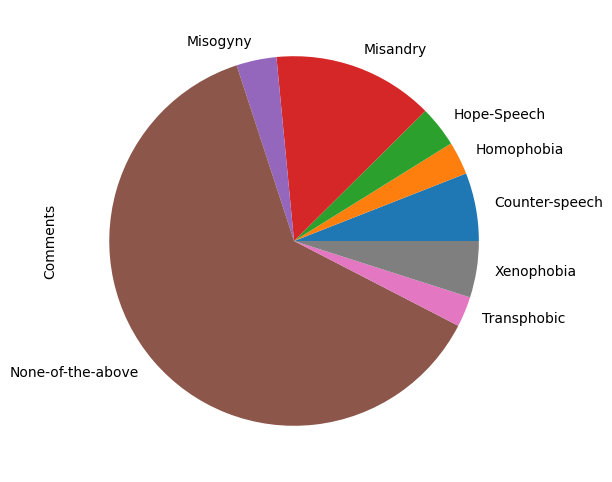

In [8]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
ta_en_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [9]:
def get_score(value):
    a = -1  # or any other default value that makes sense for your use case
    if(value == 'Transphobic'):
        a=0
    elif(value == 'Xenophobia'):
        a=1
    elif(value == 'Counter-speech'):
        a=2
    elif(value == 'Homophobia'):
        a=3
    elif(value == 'Hope-Speech'):
        a=4
    elif(value == 'Misogyny'):
        a=5 
    elif(value == 'Misandry'):
        a=6
    elif(value == 'None-of-the-above'):
        a=7
    return a
        

ta_en_misogyny_train['Label'] = ta_en_misogyny_train['Label'].map(get_score)
ta_en_misogyny_train.head(50)

,Comments,Label
0,enaku unmaikum aluha wantu thirunangaigal the...,7
1,superstar vijay dai arivuketta polu ithu thap...,0
2,ugka smile cute a iruku,7
3,anna i am waiting na,7
4,yanda tamilnadu la evvalavo pirachana iruku a...,7
5,night fulla mater ku alaiuradhu day fulla pic...,0
6,l v innum konja varshathula yaaru agadhi aah...,7
7,bala kumar wat ur asking st olunga kealv...,7
8,unaku aids vandhuruchi pola olunga iru,7
9,pradeep kodi per iruka maataanga nu nenaikir...,2


In [10]:
def preprocess_text(text):

  if isinstance(text, str):

    print("Original Text:", text)

    # Remove HTML tags
    text = re.sub('<[^>]*>', ' ', text)
    #print("Text after removing HTML tags:", text)
    # Convert to lowercase
    text =  text.lower()
    #print("Converting to lowercase:", text)
    # regular expression to match URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    #print("Text after removing regular expression to match URLs:", text)

    text = re.sub(r'\d+', ' ', text)
    #print("Text after removing digital:", text)

    # Combine words back into a single string
    preprocessed_text = ''.join(text)
    #print("Final pre-processed text:", preprocessed_text)
    return preprocessed_text
# Apply preprocessing to the 'text' column of the dataset
ta_en_misogyny_train['Comments'] = ta_en_misogyny_train['Comments'].apply(preprocess_text)
# Save cleaned dataset
ta_en_misogyny_train.head(55)

Original Text:  enaku unmaikum aluha wantu thirunangaigal theiwangal    
Original Text:  superstar vijay dai arivuketta polu ithu thappu pavam da amanda na gay relationship virukkuren  ethirkkiren
Original Text:  ugka smile cute a iruku     
Original Text:  anna i am waiting na    
Original Text:  yanda tamilnadu la evvalavo pirachana iruku athalam vittudu ethu oru pirachana vanthu kettu iruka
Original Text:  night fulla mater ku alaiuradhu day fulla pichaiku alaiuradhu idhula louds paaru potta p   a   
Original Text:  l v  innum konja varshathula yaaru agadhi aah sutha poradhunu therium thozhar   
Original Text:  bala kumar  wat ur asking    st  olunga kealviya kealunga 
Original Text:  unaku aids vandhuruchi pola olunga iru   
Original Text:  pradeep  kodi per iruka maataanga nu nenaikireengala  ellaarum ungala maadri aaluku bayandhutu open aa solla maatraanga  india la     crore la    crore lgbt thaan   aana adha open aa ellaarkitayum solradhu enna maadri konjam per thaan  
Original

,Comments,Label
0,enaku unmaikum aluha wantu thirunangaigal the...,7
1,superstar vijay dai arivuketta polu ithu thap...,0
2,ugka smile cute a iruku,7
3,anna i am waiting na,7
4,yanda tamilnadu la evvalavo pirachana iruku a...,7
5,night fulla mater ku alaiuradhu day fulla pic...,0
6,l v innum konja varshathula yaaru agadhi aah...,7
7,bala kumar wat ur asking st olunga kealv...,7
8,unaku aids vandhuruchi pola olunga iru,7
9,pradeep kodi per iruka maataanga nu nenaikir...,2


In [11]:
def remove_punctuation(text):
    # Define the punctuation characters to remove
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # Remove the punctuation characters from the text
    for punctuation in punctuations:
        text = text.replace(punctuation, "")
    return text
# Apply the function to the column containing emoji
ta_en_misogyny_train['Comments'] = ta_en_misogyny_train['Comments'].apply(remove_punctuation)

In [12]:
ta_en_misogyny_train.head(30)

,Comments,Label
0,enaku unmaikum aluha wantu thirunangaigal the...,7
1,superstar vijay dai arivuketta polu ithu thap...,0
2,ugka smile cute a iruku,7
3,anna i am waiting na,7
4,yanda tamilnadu la evvalavo pirachana iruku a...,7
5,night fulla mater ku alaiuradhu day fulla pic...,0
6,l v innum konja varshathula yaaru agadhi aah...,7
7,bala kumar wat ur asking st olunga kealv...,7
8,unaku aids vandhuruchi pola olunga iru,7
9,pradeep kodi per iruka maataanga nu nenaikir...,2


In [13]:
ta_en_misogyny_train.isnull().sum()

Comments    0
Label       0
dtype: int64

In [14]:
 ta_en_misogyny_train.duplicated().sum()

8

In [15]:
ta_en_misogyny_train.drop_duplicates(inplace = True)

In [16]:
 ta_en_misogyny_train.duplicated().sum()

0

In [17]:
# Save cleaned train_dataset to CSV file
ta_en_misogyny_train.to_csv('./train/clean-ta-en-misogyny-train.csv', index=False)

In [18]:
clean_ta_en_misogyny_train = pd.read_csv('./train/clean-ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')

In [19]:
clean_ta_en_misogyny_train.head()

,Comments,Label
0,enaku unmaikum aluha wantu thirunangaigal the...,7
1,superstar vijay dai arivuketta polu ithu thap...,0
2,ugka smile cute a iruku,7
3,anna i am waiting na,7
4,yanda tamilnadu la evvalavo pirachana iruku a...,7


In [20]:
telugu_hate_speech_train = pd.read_csv('./train/telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')
telugu_hate_speech_train.head(50)

,Comments,Label
0,Thappu chesina vaallaku vanike kaadu inka anni...,hate
1,Dhusta chaathuryam! Meeru ilantivi enni chesi...,hate
2,Vetakaram super. Govt ki siggu seram radu. End...,hate
3,Only rajakiyam ga vadukovatanike ee dharidrapu...,hate
4,Katam hogaya narayana pedda bokada college,hate
5,TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN...,non-hate
6,Nenu aite Jabardast show chudadam manesanu TV ...,non-hate
7,Jagan meeda jaganke visvasam ledu anduke ea lo...,hate
8,Students tho adukovtam thappu,non-hate
9,Srinivasa gaaru endukee panikamaalina debate.....,hate


<Axes: ylabel='Comments'>

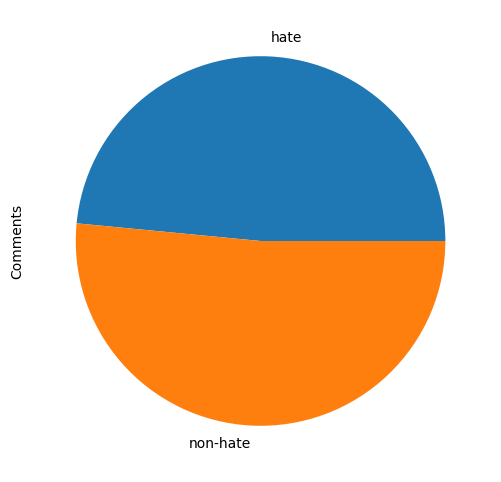

In [21]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
telugu_hate_speech_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [22]:
def get_score(value):
    a = -1  # or any other default value that makes sense for your use case
    if(value == 'non-hate'):
        a=0
    elif(value == 'hate'):
        a=1
    return a
        

telugu_hate_speech_train['Label'] = telugu_hate_speech_train['Label'].map(get_score)
telugu_hate_speech_train.head(50)

,Comments,Label
0,Thappu chesina vaallaku vanike kaadu inka anni...,1
1,Dhusta chaathuryam! Meeru ilantivi enni chesi...,1
2,Vetakaram super. Govt ki siggu seram radu. End...,1
3,Only rajakiyam ga vadukovatanike ee dharidrapu...,1
4,Katam hogaya narayana pedda bokada college,1
5,TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN...,0
6,Nenu aite Jabardast show chudadam manesanu TV ...,0
7,Jagan meeda jaganke visvasam ledu anduke ea lo...,1
8,Students tho adukovtam thappu,0
9,Srinivasa gaaru endukee panikamaalina debate.....,1


In [23]:
telugu_hate_speech_train['Comments'] = telugu_hate_speech_train['Comments'].apply(preprocess_text)
telugu_hate_speech_train['Comments'] = telugu_hate_speech_train['Comments'].apply(remove_punctuation)

Original Text: Thappu chesina vaallaku vanike kaadu inka anni modalithavi  . Enta kaalam students life tho aadukuntu crores earn chedtharu illegal ga.
Original Text: Dhusta chaathuryam!  Meeru ilantivi enni chesina em pikalerra!
Original Text: Vetakaram super. Govt ki siggu seram radu. Endukante siggu seram manushulaku mathrme vuntundani na abiprayam.
Original Text: Only rajakiyam ga vadukovatanike ee dharidrapu arestlu
Original Text: Katam hogaya narayana pedda bokada college
Original Text: TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN THE WORLD
Original Text: Nenu aite Jabardast show chudadam manesanu TV 5 ABN channels lo debates vchinaka 
Original Text: Jagan meeda jaganke visvasam ledu anduke ea loffer panulu
Original Text: Students tho adukovtam thappu
Original Text: Srinivasa gaaru endukee panikamaalina debate... Aa sambaki paniledu... Meeku jeetam kavaali ..makenti gola... Anni exams happy ga jariginai... problem meeu creat cheyyavaddu
Original Text: Meru mi media published che

In [24]:
telugu_hate_speech_train.isnull().sum()

Comments    0
Label       0
dtype: int64

In [25]:
 telugu_hate_speech_train.duplicated().sum()

46

In [26]:
telugu_hate_speech_train.drop_duplicates(inplace = True)

In [27]:
 telugu_hate_speech_train.duplicated().sum()

0

In [28]:
# Save cleaned train_dataset to CSV file
telugu_hate_speech_train.to_csv('./train/clean-telugu-hate-speech-train.csv', index=False)
clean_telugu_hate_speech_train = pd.read_csv('./train/clean-telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')

In [29]:
clean_telugu_hate_speech_train.head(50)

,Comments,Label
0,thappu chesina vaallaku vanike kaadu inka anni...,1
1,dhusta chaathuryam meeru ilantivi enni chesin...,1
2,vetakaram super govt ki siggu seram radu enduk...,1
3,only rajakiyam ga vadukovatanike ee dharidrapu...,1
4,katam hogaya narayana pedda bokada college,1
5,telugu desam party only good administration in...,0
6,nenu aite jabardast show chudadam manesanu tv ...,0
7,jagan meeda jaganke visvasam ledu anduke ea lo...,1
8,students tho adukovtam thappu,0
9,srinivasa gaaru endukee panikamaalina debate a...,1


In [30]:
ta_misogyny_train = pd.read_csv('./train/ta-misogyny-train.csv')#, encoding='ISO-8859-1')
ta_misogyny_train.head(50)


,Comments,Label
0,\tஉங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம்...,Hope-Speech
1,\tஎச். ராசாவால் இராமருக்கே இழிவு. இவர் எல்லாம...,None-of-the-above
2,\tகல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங...,None-of-the-above
3,\tTentu Kottai ஐயா நான் தமிழ் இந்து.,None-of-the-above
4,\tTamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச...,Homophobia
5,\tbro நீங்க பேசறதெல்லாம் கேக்க கேக்க இரவு துக்...,None-of-the-above
6,\tS_ B_ Narmada.D பெற்ற பிள்ளையை படிக்க வைத...,None-of-the-above
7,\tபாஜக மற்றும் அது சார்ந்த அமைப்புகள் இந்து மற...,None-of-the-above
8,\tதேவிடியா; பயா H Raja,Misandry
9,\t+பிரபல நாட்டாமை என் வீட்டுக்கு வா சுண்ணி ஊம்...,Homophobia


<Axes: ylabel='Comments'>

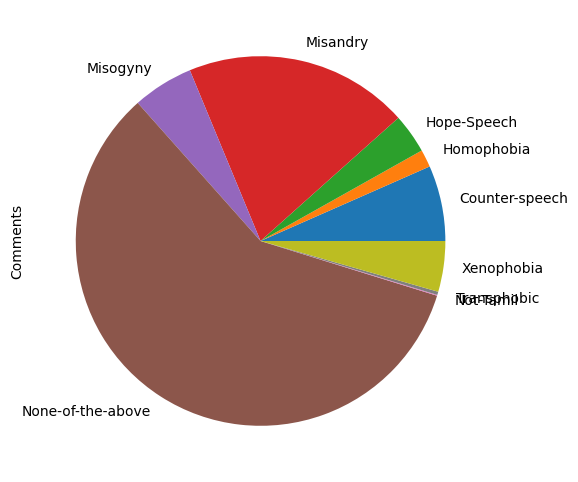

In [31]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
ta_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [32]:
def get_score(value):
    a = -1  # or any other default value that makes sense for your use case
    if(value == 'Transphobic'):
        a=0
    elif(value == 'Xenophobia'):
        a=1
    elif(value == 'Counter-speech'):
        a=2
    elif(value == 'Homophobia'):
        a=3
    elif(value == 'Hope-Speech'):
        a=4
    elif(value == 'Misogyny'):
        a=5 
    elif(value == 'Misandry'):
        a=6
    elif(value == 'None-of-the-above'):
        a=7
    return a
        

ta_misogyny_train['Label'] = ta_misogyny_train['Label'].map(get_score)
ta_misogyny_train.head()

,Comments,Label
0,\tஉங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம்...,4
1,\tஎச். ராசாவால் இராமருக்கே இழிவு. இவர் எல்லாம...,7
2,\tகல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங...,7
3,\tTentu Kottai ஐயா நான் தமிழ் இந்து.,7
4,\tTamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச...,3


In [33]:
ta_misogyny_train['Comments'] = ta_misogyny_train['Comments'].apply(preprocess_text)
ta_misogyny_train['Comments'] = ta_misogyny_train['Comments'].apply(remove_punctuation)

Original Text: 	உங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம்  அருமை.  நியாயமான முறையில் பதிவு செய்துள்ளீர்கள்.  நீண்ட காலம் வாழ்வதற்கு வாழ்த்துக்கள்.
Original Text: 	எச். ராசாவால் இராமருக்கே  இழிவு. இவர் எல்லாம் இராமர் பரம்பரையாம்.
Original Text: 	கல்யாணம்னு  வரும்போது தான் சாதி முக்கியம் எங்களுக்கு
Original Text: 	Tentu Kottai ஐயா நான் தமிழ் இந்து.
Original Text: 	Tamil selvan  அடே தேவடியாவுக்கு பிரந்தவனே பச்சத் தேவடியாவுக்கு பிரந்தவனே ... கொம்மா புண்டைல பூள பார்க் பண்ணுறேன்.என் சுன்னிய ரொம்பவும் ரசிச்சு ரசிச்சு ஊம்புரீயேடா எச்சப்புன்ட Tamil Selva...
Original Text: 	bro நீங்க பேசறதெல்லாம் கேக்க கேக்க இரவு துக்கம் வரமாட்டங்குது
Original Text: 	S_  B_  Narmada.D  பெற்ற பிள்ளையை படிக்க வைத்து aalakuvathu ஒவ்வொரு petrorin கடமை
Original Text: 	பாஜக மற்றும் அது சார்ந்த அமைப்புகள் இந்து மற்றும் பிரமாண சமூகத்தின் கட்சியே அல்ல...
Original Text: 	தேவிடியா; பயா  H   Raja
Original Text: 	+பிரபல நாட்டாமை என் வீட்டுக்கு வா சுண்ணி ஊம்பி விடு
Original Text: 	ரகுராம் ராஜன் நேர்மையான மனிதர்.
Original T

In [34]:
ta_misogyny_train.isnull().sum()

Comments    0
Label       0
dtype: int64

In [35]:
ta_misogyny_train.duplicated().sum()

3

In [36]:
ta_misogyny_train.drop_duplicates(inplace = True)

In [37]:
ta_misogyny_train.duplicated().sum()

0

In [38]:
# Save cleaned train_dataset to CSV file
ta_misogyny_train.to_csv('./train/clean-ta-misogyny-train.csv', index=False)
clean_ta_misogyny_train = pd.read_csv('./train/clean-ta-misogyny-train.csv')#, encoding='ISO-8859-1')

In [39]:
clean_ta_misogyny_train.head()

,Comments,Label
0,\tஉங்கள் பேச்சை எதிர்பார்த்தேன் நல்ல விளக்கம் ...,4
1,\tஎச் ராசாவால் இராமருக்கே இழிவு இவர் எல்லாம் ...,7
2,\tகல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங...,7
3,\ttentu kottai ஐயா நான் தமிழ் இந்து,7
4,\ttamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச...,3


##### Clean Test Data

In [40]:
#Load sen_tam_test_without_labels data
ta_en_test_without_labels = pd.read_csv('./tst/ta-en_test_without_labels.csv')#, encoding='ISO-8859-1')
ta_en_test_without_labels.head()

,ante peddi yedukkure ponnai vacci panam sambatikkuraange
0,Yella idangalilum pengalai asinga paduthuvathe...
1,Pannikku porandha paradhesi H Raja... Ponna pu...
2,Ayya white T-shirt! Tamil culture pathi mulusa...
3,Madu vandhi bjb fraudulent lady
4,புரட்சியாளன் சுபா deiii sarakku midukku nnu p...


In [41]:
# Rename the column 'old_column_name' to 'new_column_name'
ta_en_test_without_labels = ta_en_test_without_labels.rename(columns={'ante peddi yedukkure ponnai vacci panam sambatikkuraange': 'Comments'})

In [42]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(replace_emoji)

In [43]:
# Preprocess sen_tam_test_without_labels data
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(preprocess_text)
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(replace_emoji)
ta_en_test_without_labels['Comments'] = ta_en_test_without_labels['Comments'].apply(remove_punctuation)

Original Text: Yella idangalilum pengalai asinga paduthuvathey hiv velaya irukku
Original Text: Pannikku porandha paradhesi H Raja... Ponna pundaiyaandi
Original Text: Ayya white T-shirt! Tamil culture pathi mulusa padichitu pesunga ji!
Original Text: Madu vandhi  bjb fraudulent lady
Original Text: புரட்சியாளன் சுபா  deiii sarakku midukku nnu pesnadhu naangala ila neenglada potta baadu...
Original Text: Siva Kumar A  u r nos send pana bro
Original Text: H.raja punda nakkula Yar irukka
Original Text: Dravida kazigham periyar  story
Original Text: Ivangale paathaa mathippaa irukk naan paarthathilaye romba azhagaana person manass ivanga thaa nnu manasaara solgiren
Original Text: El TIGER  unaku epdi oru ponu mela attraction eruko andha Mari avangaluku same sex mela attraction eruku edha purinja theriyala na sagu
Original Text: Ramesh Selvaraj  neega entha ooru
Original Text: Ivanla Oru alu Ivana pathi pesa kuda kudathu
Original Text: Neega full ah parunga.... Avangalukaga matumey idhaa pa

In [44]:
ta_en_test_without_labels.head(50)

,Comments
0,yella idangalilum pengalai asinga paduthuvathe...
1,pannikku porandha paradhesi h raja ponna punda...
2,ayya white tshirt tamil culture pathi mulusa p...
3,madu vandhi bjb fraudulent lady
4,புரட்சியாளன் சுபா deiii sarakku midukku nnu p...
5,siva kumar a u r nos send pana bro
6,hraja punda nakkula yar irukka
7,dravida kazigham periyar story
8,ivangale paathaa mathippaa irukk naan paarthat...
9,el tiger unaku epdi oru ponu mela attraction ...


In [45]:
# Save cleaned train_dataset to CSV file
ta_en_test_without_labels.to_csv('./tst/clean-ta-en_test_without_labels.csv', index=False)

In [46]:
#Load  data
tamil_test_without_labels = pd.read_csv('./tst/tamil_test_without_labels.csv')#, encoding='ISO-8859-1')
tamil_test_without_labels.head()

,அந்த தமிழன் ஒரு சாதிவெறி
0,இந்த வந்தேரிக்கு தகுந்த பாடம் கற்பிப்பார்கள் த...
1,எச்ச ராஜா நீ ஒரு மானங்கெட்ட தாயை விட நீ
2,பணம் இருக்கும் இடத்தில் கேட்பது தவறு இல்லை பண...
3,சக தோழியாக நினைத்து ஆதரவு தாருங்கள் நண்பர்களே!...
4,பல நல்ல கருத்துக்களை சொன்ன திருவள்ளுவர் கணவன்...


In [47]:
# Rename the column 'old_column_name' to 'new_column_name'
tamil_test_without_labels = tamil_test_without_labels.rename(columns={'அந்த தமிழன் ஒரு சாதிவெறி': 'Comments'})

In [48]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(replace_emoji)

In [49]:
# Preprocess sen_tam_test_without_labels data
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(preprocess_text)
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(replace_emoji)
tamil_test_without_labels['Comments'] = tamil_test_without_labels['Comments'].apply(remove_punctuation)

Original Text: இந்த வந்தேரிக்கு தகுந்த பாடம் கற்பிப்பார்கள் தமிழர்கள்.
Original Text: எச்ச ராஜா நீ ஒரு மானங்கெட்ட தாயை விட நீ
Original Text: பணம் இருக்கும் இடத்தில் கேட்பது தவறு  இல்லை பணம் இல்லாத இடத்தில் கேட்பதுதான் தவறு
Original Text: சக தோழியாக நினைத்து ஆதரவு தாருங்கள் நண்பர்களே!!!!  பயனுள்ள வகையில் தகவல்களைபதிவிடுகிறேனன் பார்த்து விட்டு ஆதரவு தாருங்கள்...
Original Text: பல நல்ல கருத்துக்களை சொன்ன திருவள்ளுவர்  கணவன் மனைவி பேச்சைக் கேட்டு நடக்கக்கூடாது.... அப்படி நடந்தால் வாழ்க்கை சீரழிந்துவிடும் என்று எழுதி இருப்பது வருத்தமளிக்கிறது.
Original Text: சூத்திர பொட்ட ஜாதிவெறி புண்டை உன் சூத்திர கும்பல் ஆப்பிரிக்கா வில் இருந்து வந்தது....சாணிக்கும்
Original Text: +பிரபல நாட்டாமை 8 க்கு இருக்கு
Original Text: Fathima.yashin Shakh  இது துலுக்க புண்டை...
Original Text: எதற்க்கு எடுத்தாலும் எடுத்தெரிந்து பேசும் மனைவியிடம் எப்படி குடும்பம் நடத்துவது?
Original Text: சாதி வெறி காட்டுமிராண்டி நாய்ங்க எவன்
Original Text: எச் ராஜா  பெண்
Original Text: Correct தலைவா... அவரவர் குடும்பத்தில் குழந்தை

In [50]:
tamil_test_without_labels.head(50)

,Comments
0,இந்த வந்தேரிக்கு தகுந்த பாடம் கற்பிப்பார்கள் த...
1,எச்ச ராஜா நீ ஒரு மானங்கெட்ட தாயை விட நீ
2,பணம் இருக்கும் இடத்தில் கேட்பது தவறு இல்லை பண...
3,சக தோழியாக நினைத்து ஆதரவு தாருங்கள் நண்பர்களே ...
4,பல நல்ல கருத்துக்களை சொன்ன திருவள்ளுவர் கணவன்...
5,சூத்திர பொட்ட ஜாதிவெறி புண்டை உன் சூத்திர கும்...
6,+பிரபல நாட்டாமை க்கு இருக்கு
7,fathimayashin shakh இது துலுக்க புண்டை
8,எதற்க்கு எடுத்தாலும் எடுத்தெரிந்து பேசும் மனைவ...
9,சாதி வெறி காட்டுமிராண்டி நாய்ங்க எவன்


In [51]:
# Save cleaned train_dataset to CSV file
tamil_test_without_labels.to_csv('./tst/clean-tamil_test_without_labels.csv', index=False)

In [52]:

#Load  data
tamil_test_without_labels = pd.read_csv('./tst/clean-tamil_test_without_labels.csv')#, encoding='ISO-8859-1')
tamil_test_without_labels.head(50)

,Comments
0,இந்த வந்தேரிக்கு தகுந்த பாடம் கற்பிப்பார்கள் த...
1,எச்ச ராஜா நீ ஒரு மானங்கெட்ட தாயை விட நீ
2,பணம் இருக்கும் இடத்தில் கேட்பது தவறு இல்லை பண...
3,சக தோழியாக நினைத்து ஆதரவு தாருங்கள் நண்பர்களே ...
4,பல நல்ல கருத்துக்களை சொன்ன திருவள்ளுவர் கணவன்...
5,சூத்திர பொட்ட ஜாதிவெறி புண்டை உன் சூத்திர கும்...
6,+பிரபல நாட்டாமை க்கு இருக்கு
7,fathimayashin shakh இது துலுக்க புண்டை
8,எதற்க்கு எடுத்தாலும் எடுத்தெரிந்து பேசும் மனைவ...
9,சாதி வெறி காட்டுமிராண்டி நாய்ங்க எவன்


In [54]:
#Load  data
telugu_hate_speech_test = pd.read_csv('./tst/telugu-hate-speech-test.csv.csv')#, encoding='ISO-8859-1')
telugu_hate_speech_test.head()

,1,"ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూపర్ మా,,"
0,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.
1,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...
2,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...
3,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...
4,6,వావ్ సూపర్ అమ్మ god bless u తల్లి


In [55]:
# Rename the column 'old_column_name' to 'new_column_name'
telugu_hate_speech_test = telugu_hate_speech_test.rename(columns={'ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూపర్ మా,,': 'Comments'})

In [56]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(replace_emoji)

In [57]:
# Preprocess sen_tam_test_without_labels data
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(preprocess_text)
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(replace_emoji)
telugu_hate_speech_test['Comments'] = telugu_hate_speech_test['Comments'].apply(remove_punctuation)

Original Text: ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.
Original Text: ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే సాధ్యం. 
Original Text: తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగా ఉంది
Original Text: సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలని కోరుకుంటున్నాను అల్ ది బెస్టు
Original Text: వావ్ సూపర్ అమ్మ god bless u తల్లి
Original Text: ఈ స్కూల్ ని NRI వాళ్ళు Develop చేస్తున్నారు. మిగిలిన స్కూళ్లు కూడా ఎవరో ఒక్కరు మారిస్తే బాగుంటుంది
Original Text: సూపర్ బంగారం బాగా చదువుతున్నావ్ కంపల్సరీ ఈ జాబు నీకే వస్తాది .
Original Text: చాలా బాగా నేర్పిస్తున్నారు పిల్లలకి
Original Text: మ్మెల్యే కాకముందే పోలీస్ ఆఫీసర్ ఇలా నించో పెడుతున్నారు ఇక ముఖ్యమంత్రి అయినాడో జనాలని పరుగులు తీయిస్తాడు
Original Text: అబ్బా అబ్బా ఏమి మాట్లాడారు సర్ కేక పుట్టించే సేరుగా నిప్పు సర్ మీరు
Original Text: సూపర్ సార్ మీరు చంద్రబాబు నాయుడుకి కావాల్సింది మీలాంటివారు
Original Text: రోమాలు నిక్కబోడుచున్నాయ్ మీ స్పీచ్ తో పవర్ ఫుల్ లీడర్ exlent వాయిస్
Original Text: సూపర్ అన్న, తగ్గేదే లేదు అన్న, మీరు తగ్గకండి.
Or

In [58]:
telugu_hate_speech_test.head()

,1,Comments
0,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్
1,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...
2,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...
3,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...
4,6,వావ్ సూపర్ అమ్మ god bless u తల్లి


In [59]:
# Save cleaned train_dataset to CSV file
telugu_hate_speech_test.to_csv('./tst/clean-telugu-hate-speech-test.csv', index=False)

#Load  data
telugu_hate_speech_test = pd.read_csv('./tst/clean-telugu-hate-speech-test.csv')#, encoding='ISO-8859-1')
telugu_hate_speech_test.head(50)

,1,Comments
0,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్
1,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...
2,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...
3,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...
4,6,వావ్ సూపర్ అమ్మ god bless u తల్లి
5,7,ఈ స్కూల్ ని nri వాళ్ళు develop చేస్తున్నారు మి...
6,8,సూపర్ బంగారం బాగా చదువుతున్నావ్ కంపల్సరీ ఈ జాబ...
7,9,చాలా బాగా నేర్పిస్తున్నారు పిల్లలకి
8,10,మ్మెల్యే కాకముందే పోలీస్ ఆఫీసర్ ఇలా నించో పెడు...
9,11,అబ్బా అబ్బా ఏమి మాట్లాడారు సర్ కేక పుట్టించే స...


###### Balanced Data for clean-ta-en-misogyny-train

In [60]:
clean_ta_en_misogyny_train= pd.read_csv('./train/clean-ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')
clean_ta_en_misogyny_train.head(5)

,Comments,Label
0,enaku unmaikum aluha wantu thirunangaigal the...,7
1,superstar vijay dai arivuketta polu ithu thap...,0
2,ugka smile cute a iruku,7
3,anna i am waiting na,7
4,yanda tamilnadu la evvalavo pirachana iruku a...,7


<Axes: ylabel='Comments'>

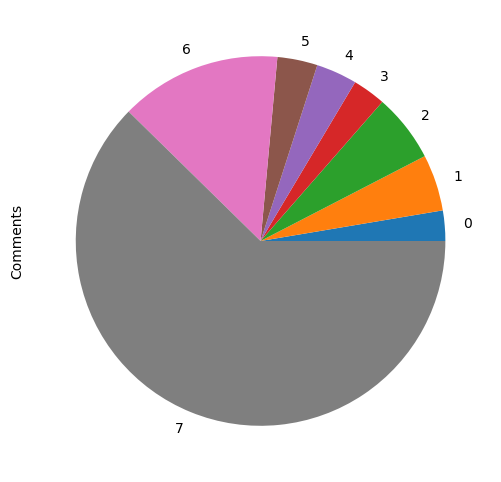

In [61]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
clean_ta_en_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [67]:
#Separate data into eight classes
class_0=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==0]
class_1=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==1]
class_2=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==2]
class_3=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==3]
class_4=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==4]
class_5=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==5]
class_6=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==6]
class_7=clean_ta_en_misogyny_train[clean_ta_en_misogyny_train.Label==7]

In [63]:
from sklearn.utils import resample

In [68]:
#Determine the class with most samle
majority_class_samples=max(len(class_0),len(class_1), len(class_2),len(class_3),len(class_4),len(class_5),len(class_6),len(class_7))

In [69]:
#Upsample minority classes
class_0_upsample=resample(class_0, replace=True, n_samples=majority_class_samples, random_state=42)
class_1_upsample=resample(class_1, replace=True, n_samples=majority_class_samples, random_state=42)
class_2_upsample=resample(class_2, replace=True, n_samples=majority_class_samples, random_state=42)
class_3_upsample=resample(class_3, replace=True, n_samples=majority_class_samples, random_state=42)
class_4_upsample=resample(class_4, replace=True, n_samples=majority_class_samples, random_state=42)
class_5_upsample=resample(class_5, replace=True, n_samples=majority_class_samples, random_state=42)
class_6_upsample=resample(class_6, replace=True, n_samples=majority_class_samples, random_state=42)
class_7_upsample=resample(class_7, replace=True, n_samples=majority_class_samples, random_state=42)

In [71]:
#combine upsample classes
balanced_data=pd.concat([class_0_upsample,class_1_upsample,class_2_upsample,class_3_upsample,class_4_upsample,class_5_upsample,class_6_upsample,class_7_upsample])

In [72]:
#Save balanced data to CSV
balanced_data.to_csv('./train/balanced-clean-ta-en-misogyny-train.csv', index=False)

In [73]:
balanced_clean_ta_en_misogyny_train= pd.read_csv('./train/balanced-clean-ta-en-misogyny-train.csv')#, encoding='ISO-8859-1')
balanced_clean_ta_en_misogyny_train.head(5)

,Comments,Label
0,smart subash evangala mari alunga ulagathaya ...,0
1,ne solrathu correct than avanga enna sonalum ...,0
2,yaa muthavi unna patha pombala mari illa amba...,0
3,advice lam nallan tan eruku appe un magalai ...,0
4,...,0


<Axes: ylabel='Comments'>

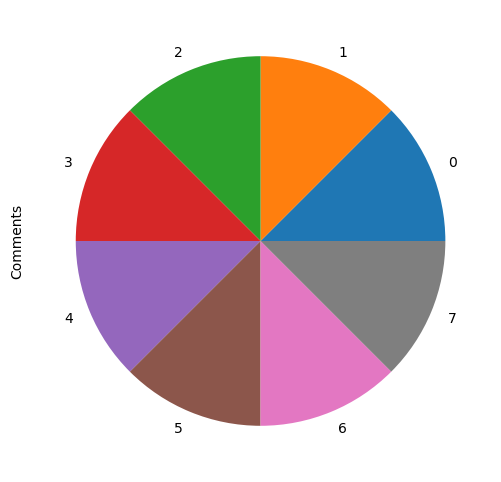

In [74]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
balanced_clean_ta_en_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

###### Balanced Data for clean-ta-misogyny-train.csv

In [76]:
clean_ta_misogyny_train= pd.read_csv('./train/clean-ta-misogyny-train.csv')#, encoding='ISO-8859-1')
clean_ta_misogyny_train.head(5)

,Comments,Label
0,\tஉங்கள் பேச்சை எதிர்பார்த்தேன் நல்ல விளக்கம் ...,4
1,\tஎச் ராசாவால் இராமருக்கே இழிவு இவர் எல்லாம் ...,7
2,\tகல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங...,7
3,\ttentu kottai ஐயா நான் தமிழ் இந்து,7
4,\ttamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச...,3


<Axes: ylabel='Comments'>

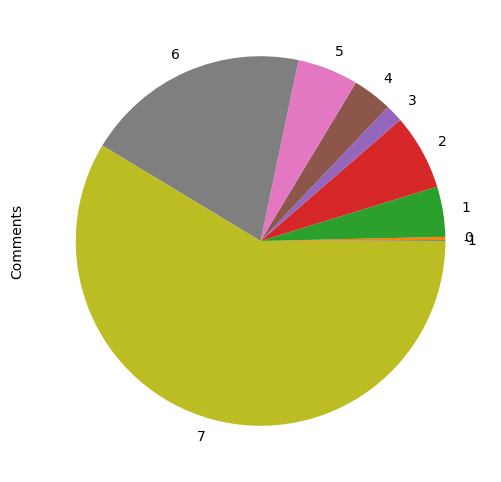

In [77]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
clean_ta_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [78]:
#Separate data into eight classes
class_0=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==0]
class_1=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==1]
class_2=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==2]
class_3=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==3]
class_4=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==4]
class_5=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==5]
class_6=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==6]
class_7=clean_ta_misogyny_train[clean_ta_misogyny_train.Label==7]

In [79]:
#Determine the class with most samle
majority_class_samples=max(len(class_0),len(class_1), len(class_2),len(class_3),len(class_4),len(class_5),len(class_6),len(class_7))

In [80]:
#combine upsample classes
balanced_data_ta_misogyny_train=pd.concat([class_0_upsample,class_1_upsample,class_2_upsample,class_3_upsample,class_4_upsample,class_5_upsample,class_6_upsample,class_7_upsample])

In [82]:
#Save balanced data to CSV
balanced_data.to_csv('./train/balanced-clean-ta-misogyny-train.csv', index=False)

In [83]:
balanced_clean_ta_misogyny_train= pd.read_csv('./train/balanced-clean-ta-misogyny-train.csv')#, encoding='ISO-8859-1')
balanced_clean_ta_misogyny_train.head(5)

,Comments,Label
0,smart subash evangala mari alunga ulagathaya ...,0
1,ne solrathu correct than avanga enna sonalum ...,0
2,yaa muthavi unna patha pombala mari illa amba...,0
3,advice lam nallan tan eruku appe un magalai ...,0
4,...,0


<Axes: ylabel='Comments'>

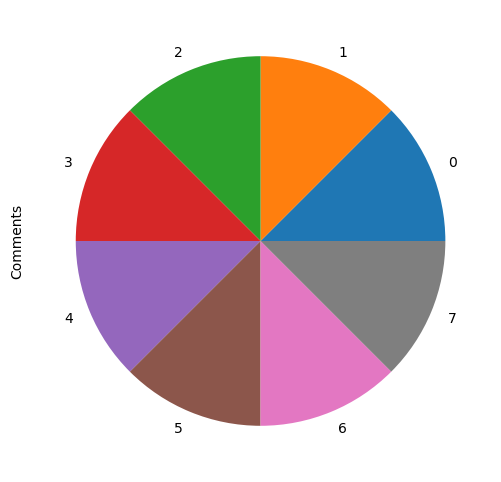

In [84]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
balanced_clean_ta_misogyny_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [85]:
clean_telugu_hate_speech_train= pd.read_csv('./train/clean-telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')
clean_telugu_hate_speech_train.head(5)

,Comments,Label
0,thappu chesina vaallaku vanike kaadu inka anni...,1
1,dhusta chaathuryam meeru ilantivi enni chesin...,1
2,vetakaram super govt ki siggu seram radu enduk...,1
3,only rajakiyam ga vadukovatanike ee dharidrapu...,1
4,katam hogaya narayana pedda bokada college,1


<Axes: ylabel='Comments'>

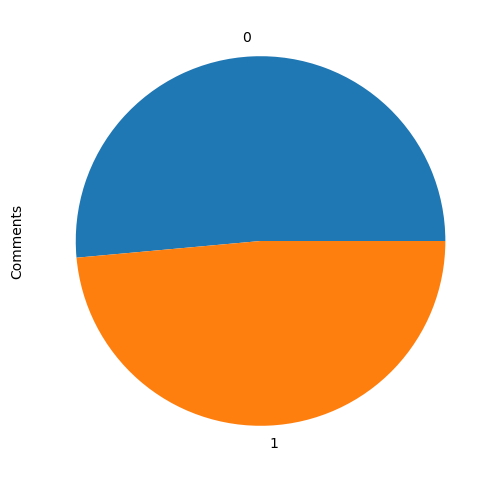

In [86]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
clean_telugu_hate_speech_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)

In [ ]:
#Separate data into eight classes
class_0=clean_telugu_hate_speech_train[clean_telugu_hate_speech_train.Label==0]
class_1=clean_telugu_hate_speech_train[clean_telugu_hate_speech_train.Label==1]

In [87]:
#Determine the class with most samle
majority_class_samples=max(len(class_0),len(class_1))

In [89]:
#combine upsample classes
balanced_clean_telugu_hate_speech_train=pd.concat([class_0_upsample,class_1_upsample])

In [90]:
#Save balanced data to CSV
balanced_clean_telugu_hate_speech_train.to_csv('./train/balanced-clean-telugu-hate-speech-train.csv', index=False)

In [91]:
balanced_clean_telugu_hate_speech_train= pd.read_csv('./train/balanced-clean-telugu-hate-speech-train.csv')#, encoding='ISO-8859-1')
balanced_clean_telugu_hate_speech_train.head(5)

,Comments,Label
0,smart subash evangala mari alunga ulagathaya ...,0
1,ne solrathu correct than avanga enna sonalum ...,0
2,yaa muthavi unna patha pombala mari illa amba...,0
3,advice lam nallan tan eruku appe un magalai ...,0
4,...,0


<Axes: ylabel='Comments'>

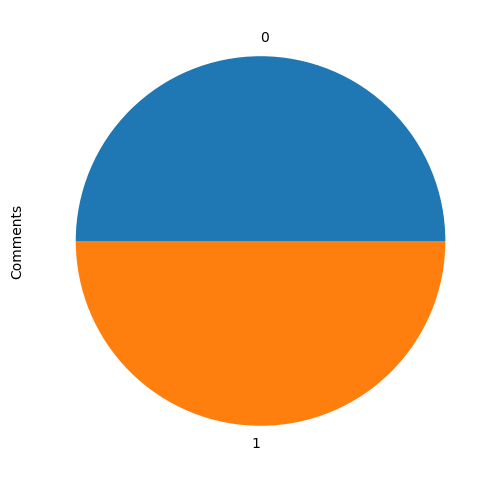

In [92]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
balanced_clean_telugu_hate_speech_train.groupby('Label')['Comments'].count().plot.pie(ax=axis)